### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [1]:
import sys  
sys.path.insert(0, '../')

import HPO
import pysgpp
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import sklearn.metrics
from sklearn.model_selection import KFold
import numpy as np
import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.random import seed
import random
import time
import os
import math
from matplotlib import cm
import matplotlib 

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 0

SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

2023-06-28 15:02:59.581850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 15:03:00.550426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Hyperparameter space definition

In [2]:
hyperparameterspace = {
    'x0': ["interval", -5, 10],
    'x1': ["interval", -5, 10],
    #'learning_rate': ["interval-log", 0.000000001, 0.1],
    #'number_layers': ["interval-int", 1, 20],
    #'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Experiment parameters

In [3]:


BUDGETS = [1 + i * 52 for i in range(19)]

### Optimization

Optimum:
[2.158598821568589, 4.617761379300443]
1.516970687940725


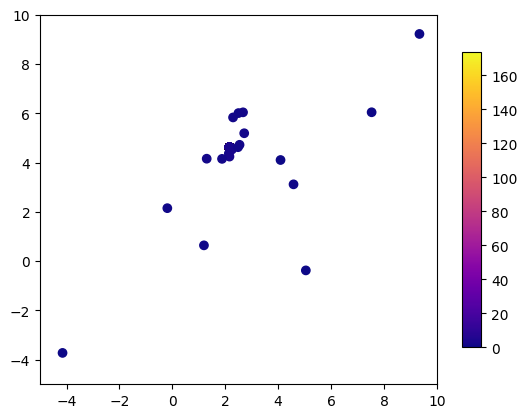

Optimum:
[2.158598821568589, 4.617761379300443]
1.516970687940725


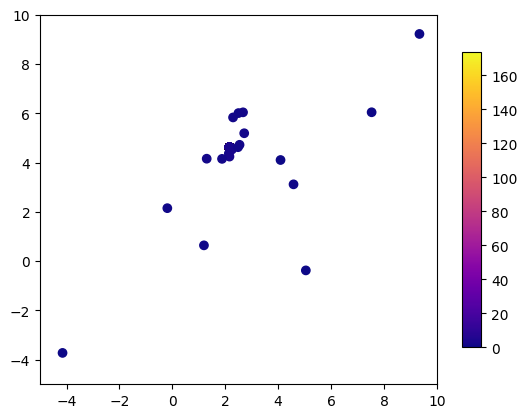

Optimum:
[0.34656943358341086, -0.003637936824420998]
1.9583359061024062


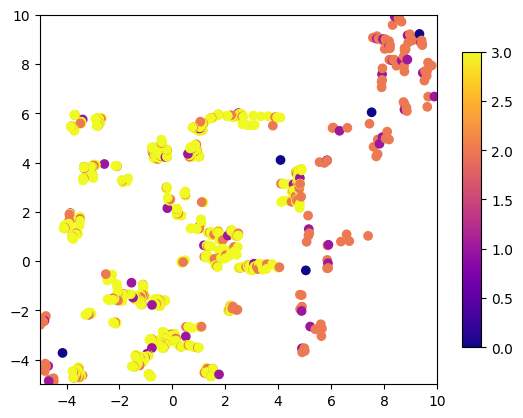

Optimum:
[0.9760154466247806, 0.9528128994924838]
0.0005795332510990866


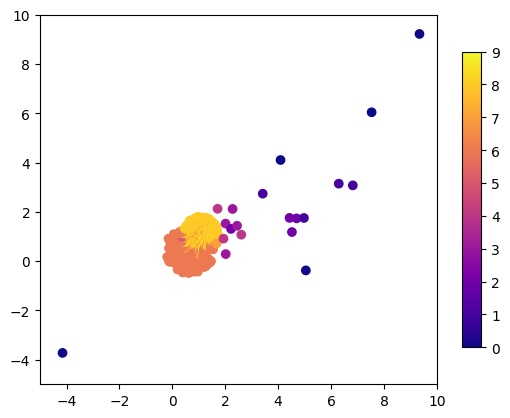

Optimum:
[1.0146644531831506, 1.029740835678759]
0.0002189224836634854


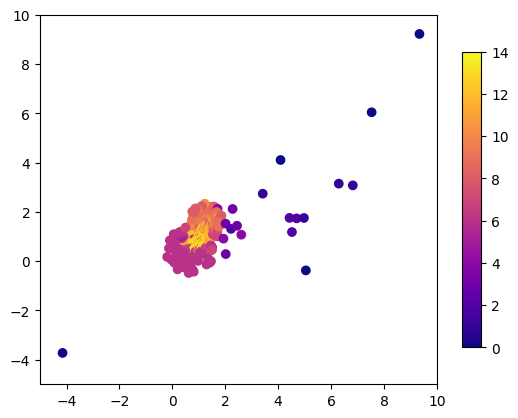

Optimum:
[1.2288143127508508, 1.5342838432017898]
0.11140123776420308


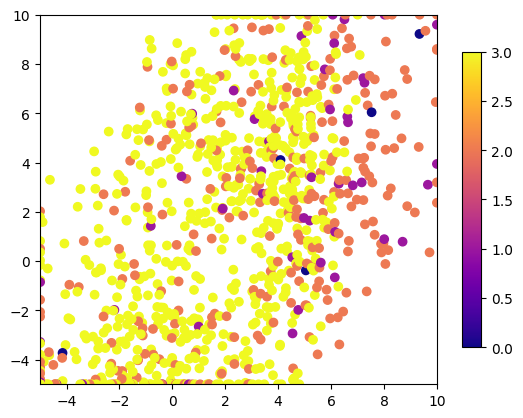

Optimum:
[1.1906678252248097, 1.4123770692020003]
0.03917680483505934


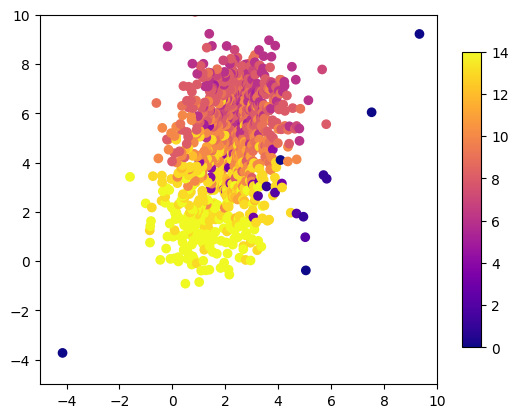

Optimum:
[0.9320220852269206, 0.8641065300317231]
0.006699114317526919


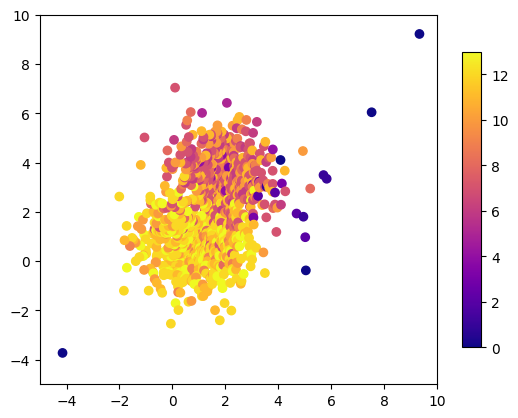

Optimum:
[1.9604049810181288, 3.816283975066066]
0.9947587131404851


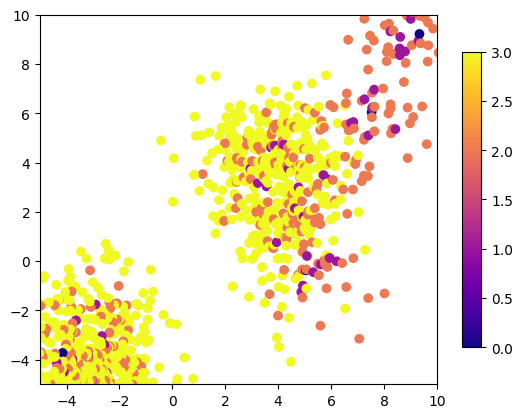

In [4]:

################## MODEL AND FUNCTION DEFINITION ####################

def evaluate_model(epochs, batch_size):
    #return epochs * batch_size
    ################### ROSENBROCK ###############
    sum = 0
    sum += (1-epochs)**2 + 100 * (batch_size - epochs**2) ** 2
    return sum

    # ################# RASTRIGIN #################
    sum = 0
    sum += epochs ** 2 - 10 * math.cos(2 * math.pi * epochs)
    sum += batch_size ** 2 - 10 * math.cos(2 * math.pi * batch_size)
    
    return len(hyperparameterspace) * 10 + sum

def function(coordinates):
    return evaluate_model(coordinates[0], coordinates[1])


BUDGET = 1000
INIT_POINTS = 5

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()
